In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib ipympl

import sys
sys.path.append('/Users/austin/Documents/GitHub/atomai')
import atomai as aoi
print(aoi.__version__)

import torch
from torch.utils.data import DataLoader
from scipy.ndimage import gaussian_filter

0.7.8.MAC


In [3]:
expdata = np.load('exp_data.npy')
#expdata = gaussian_filter(expdata,sigma=8)

In [4]:
image_dim = 512
dataset = np.load('../PdSeM_train_test_512_4class.npz')
images = dataset['X_train'].reshape(-1,1,image_dim,image_dim)
labels = dataset['y_train'].reshape(-1,image_dim,image_dim)
images_test = dataset['X_test'].reshape(-1,1,image_dim,image_dim)
labels_test = dataset['y_test'].reshape(-1,image_dim,image_dim)

print(images.shape, labels.shape)
print(images_test.shape, labels_test.shape)


(2368, 1, 512, 512) (2368, 512, 512)
(832, 1, 512, 512) (832, 512, 512)


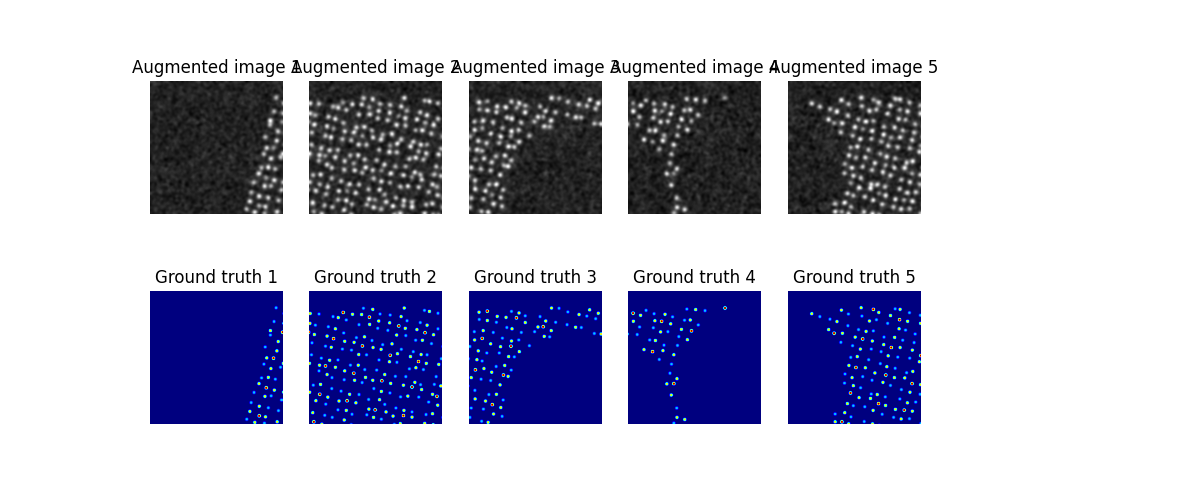

In [5]:
n = 5 # number of images to plot

n = n + 1
fig = plt.figure( figsize=(12, 5))
for i in range(1, n):
    ax = fig.add_subplot(2, n, i)
    ax.imshow(images[i-1,0,:,:], cmap='gray')
    ax.set_title('Augmented image ' + str(i))
    ax.grid(alpha = 0.5)
    ax.set_axis_off()
    ax = fig.add_subplot(2, n, i+n)
    ax.imshow(labels[i-1], interpolation='Gaussian', cmap='jet')
    ax.set_title('Ground truth ' + str(i))
    ax.grid(alpha=0.75)
    ax.set_axis_off()

In [ ]:
model = aoi.models.Segmentor(nb_classes=4)
# print(model.net)

In [ ]:
model.fit(images, labels, images_test, labels_test, training_cycles=100, compute_accuracy=True, swa=True, batch_size=32)

In [56]:
nn_output, coordinates = model.predict(expdata)

Batch 169/169
169 images were decoded in approximately 29.483 seconds


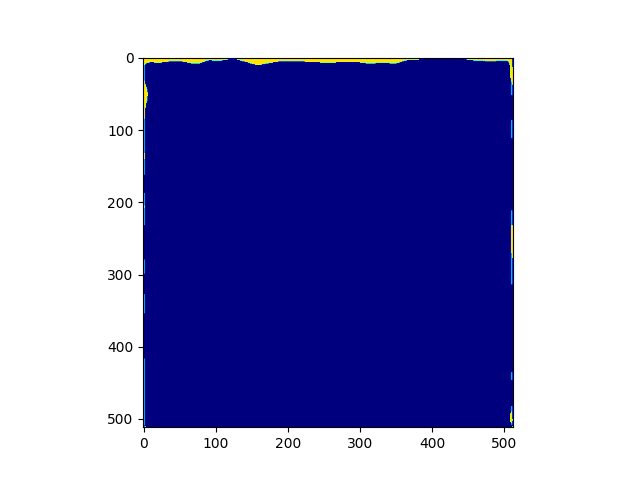

In [68]:
plt.figure()
plt.imshow(np.argmax(nn_output,axis=2).reshape((512,512)),cmap='jet')

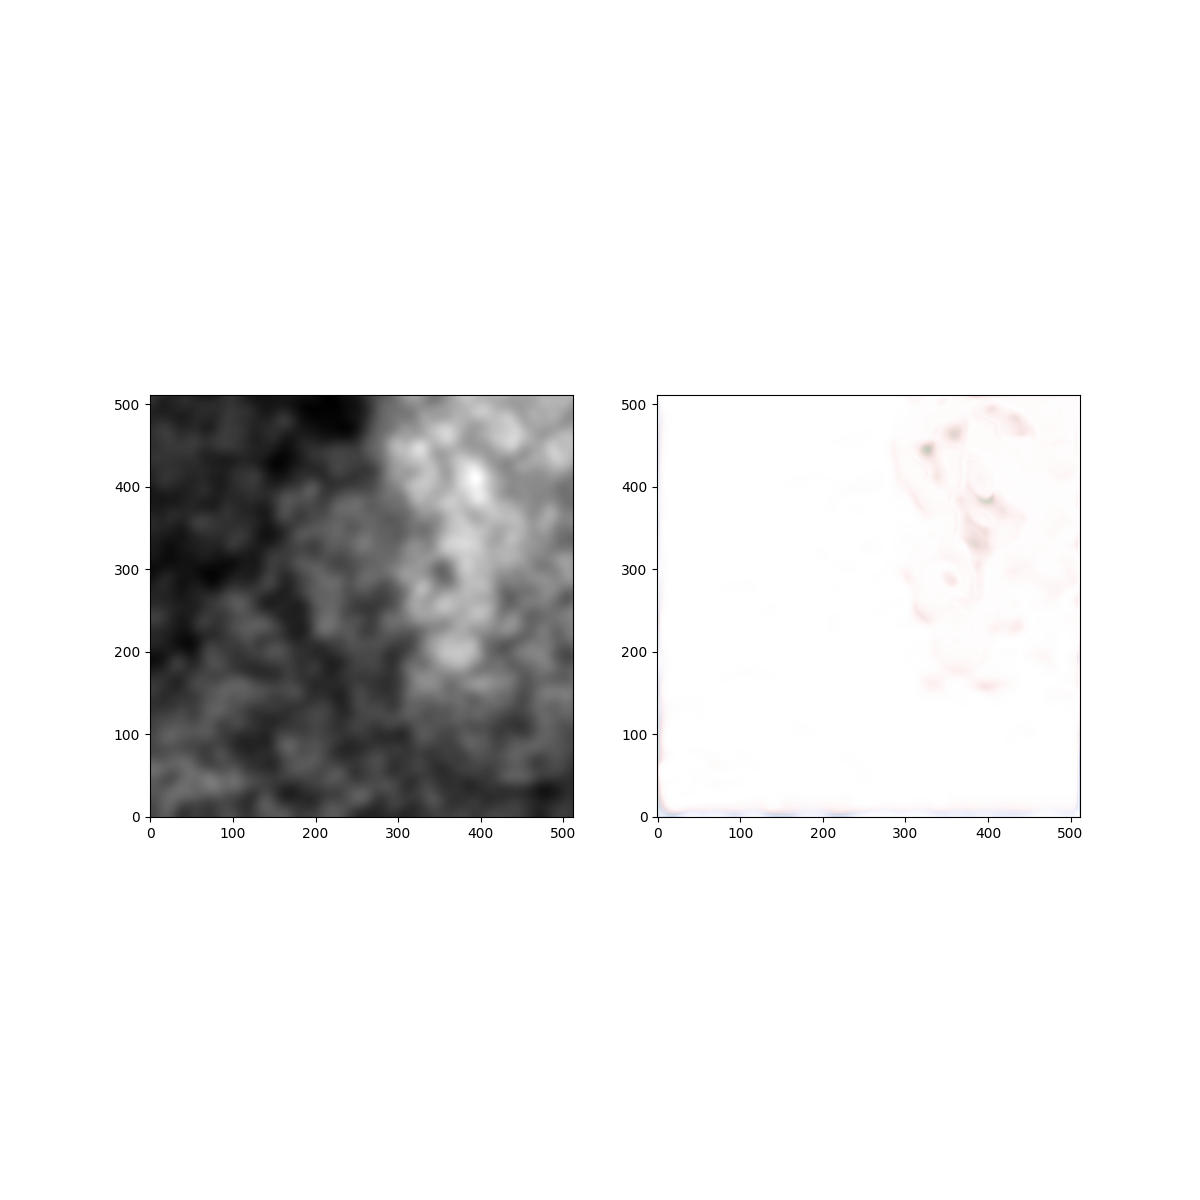

In [70]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(expdata, cmap='gray', origin="lower")
ax2.imshow(nn_output.squeeze(), origin="lower")

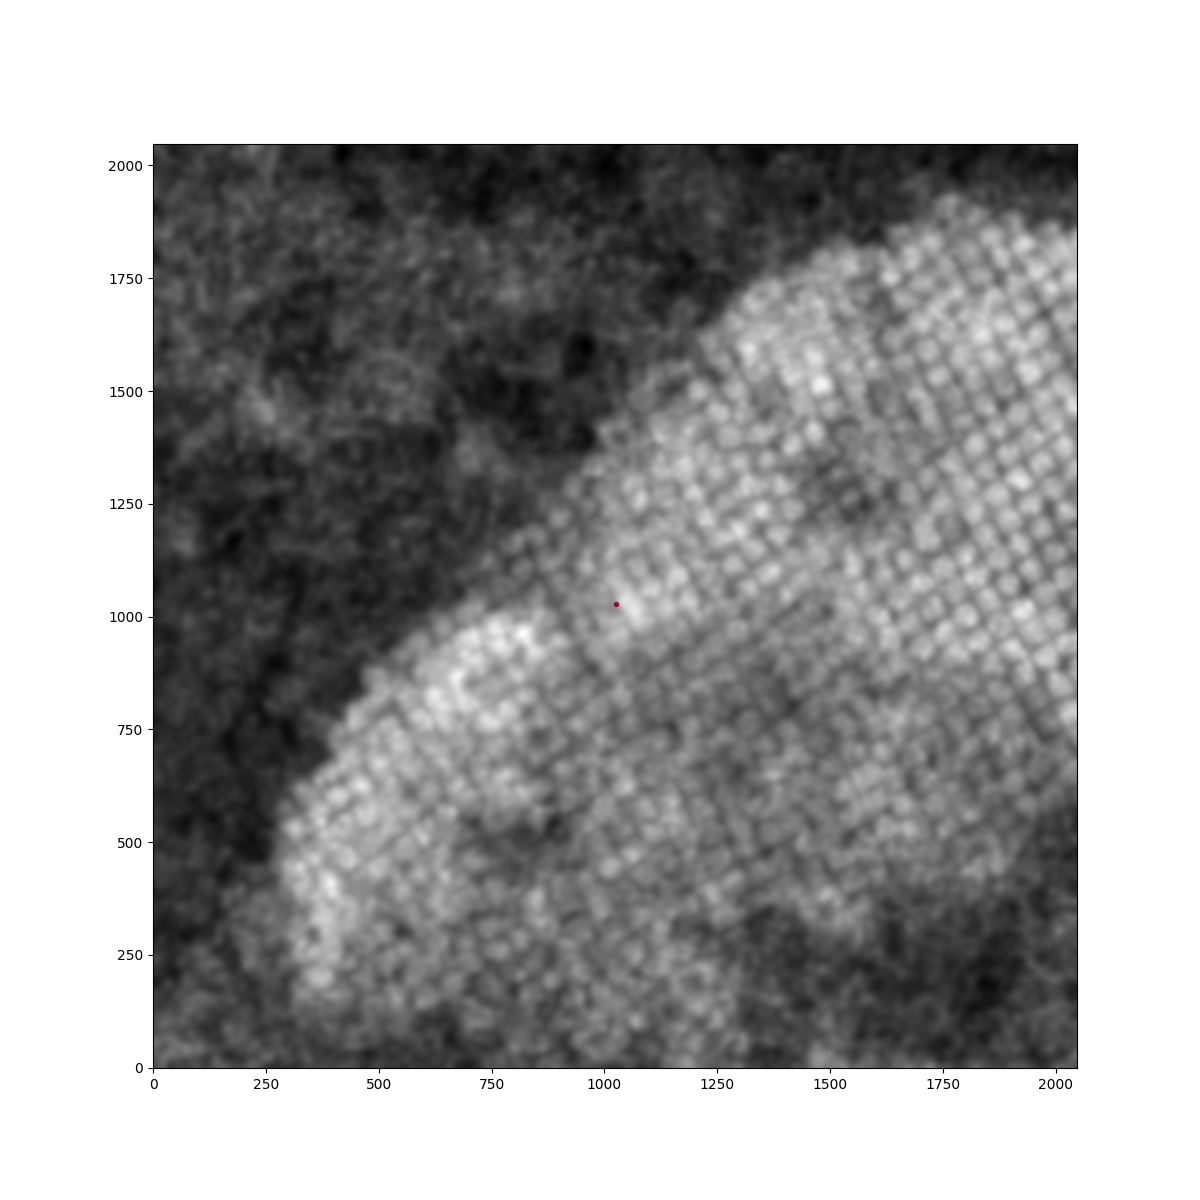

In [50]:
aoi.utils.plot_coord(expdata, coordinates[0], fsize=12)

In [ ]:
import torch
torch.save(model, f='drive/MyDrive/Colab Notebooks/model2048.pt')